In [4]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import *
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import glob

In [5]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

In [6]:
model = keras.models.load_model('best_model.h5')

2023-02-19 11:28:04.904345: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 11:28:04.922694: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 11:28:04.922819: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 11:28:04.923147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [7]:
test_dir = 'asl_alphabet_test'

In [10]:
test_prediction = []
for i in glob.glob(test_dir + '/*'):
    img = cv2.imread(i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    output = cv2.resize(img, (200,200))

    input_arr = np.array([output])
    predict = np.argmax(model.predict(input_arr))
    test_prediction.append(class_names[predict])

2023-02-19 11:33:38.764049: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


1/1 [==============================] - 0s 13ms/step


In [17]:
def load_test_data(folder):
    images = []
    names = []
    size = 64,64
    for image in os.listdir(folder):
        temp = cv2.imread(folder + '/' + image)
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        temp = cv2.resize(temp, size)
        images.append(temp)
        names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data(test_dir)

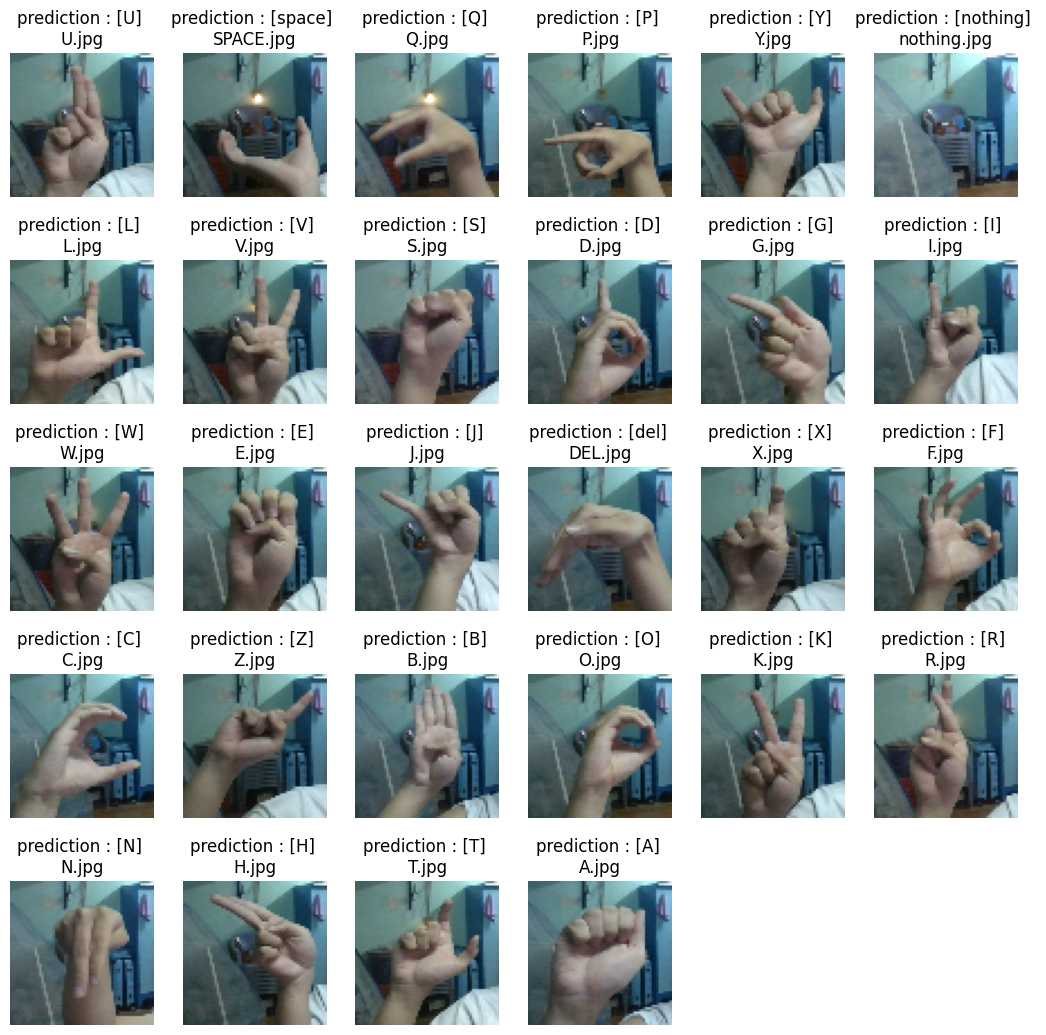

In [18]:
predfigure = plt.figure(figsize = (13,13))
def plot_image_1(fig, image, label, prediction,  row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(prediction) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], test_prediction[image_index], row, col, i)
    image_index = image_index + 1
plt.show()